# Comprar um imóvel

### Valorização anual do imóvel

Realizamos uma consulta ao FipeZAP+ por meio da plataforma Fipe, um índice de preços abrangente em nível nacional que monitora os valores de imóveis residenciais e comerciais. A partir dessa consulta, obtivemos a taxa de valorização anual para imóveis residenciais de 1 a 4 dormitórios na cidade de São Paulo, abrangendo o período de janeiro de 2009 a junho de 2023, conforme ilustrado no gráfico abaixo:

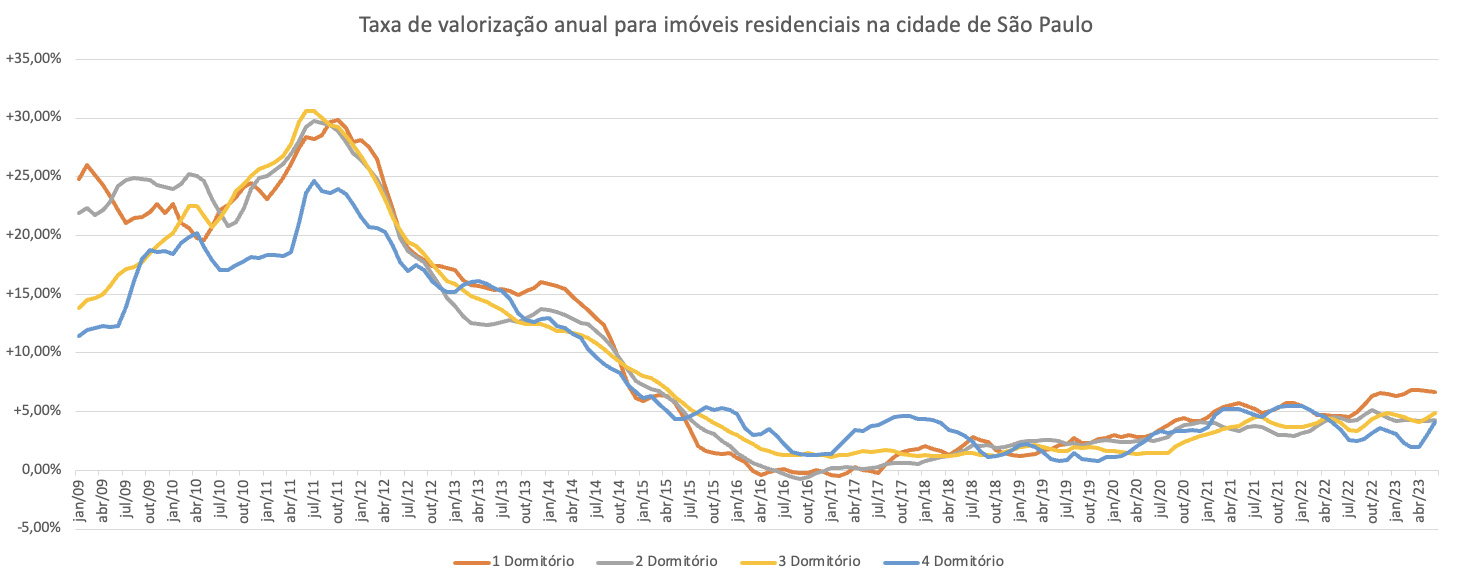

Dado que a valorização de imóveis é influenciada por diversos fatores, tais como localização, segurança, infraestrutura, área de lazer, estrutura da residência, condições do condomínio e documentação do imóvel, tomamos a decisão de não levar em consideração esses e outros elementos que poderiam ser utilizados, como a quantidade de dormitórios, tipo de apartamento ou público-alvo. Em vez disso, optamos por calcular uma média das taxas de valorização entre as diferentes configurações de dormitórios disponibilizadas.

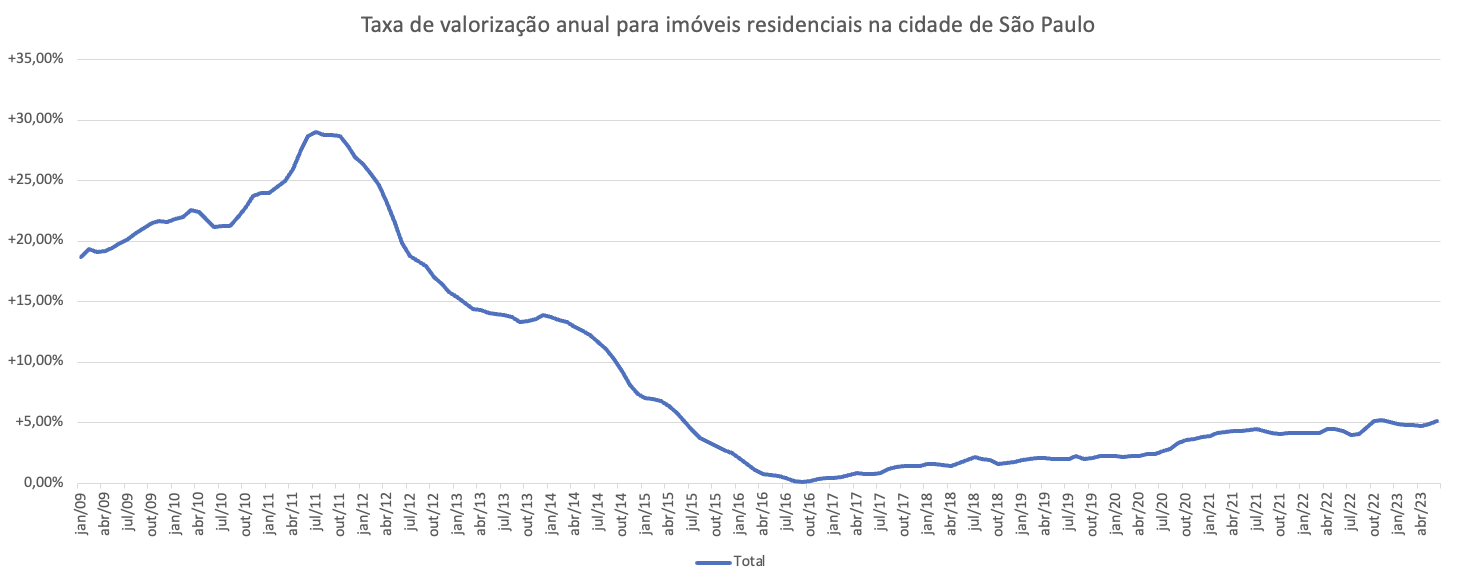

Com base nos dados apresentados, é possível inferir que a partir de outubro de 2016, a taxa de valorização anual tem mostrado um crescimento contínuo. Utilizando a análise de regressão linear, identificamos um coeficiente sustentável que sugere uma progressão linear, conforme ilustrado nos dados abaixo:

Estatística de regressão

                R múltiplo	0,972118476
            Quadrado de R	0,945014332
    Quadrado de R ajustado	0,944318311
                Erro-padrão	0,003448712



A taxa de valorização inicial no mês de junho de 2023 foi calculada como sendo de 5,19918707909521%, com um acréscimo de 0,724460595785752% a cada ano que se passa. Portanto, as taxas projetadas para os próximos 20 anos seriam as seguintes:

2024: 5,92364767488097%
2025: 6,64810827066672%
2026: 7,37256886645247%
...
2043: 18,9840840637684%

Essas projeções podem ser valiosas para embasar decisões de investimentos e compreender a tendência de valorização dos imóveis ao longo do tempo. No entanto, é importante ressaltar que análises futuras podem requerer ajustes ou considerar outros fatores para garantir a precisão das estimativas.

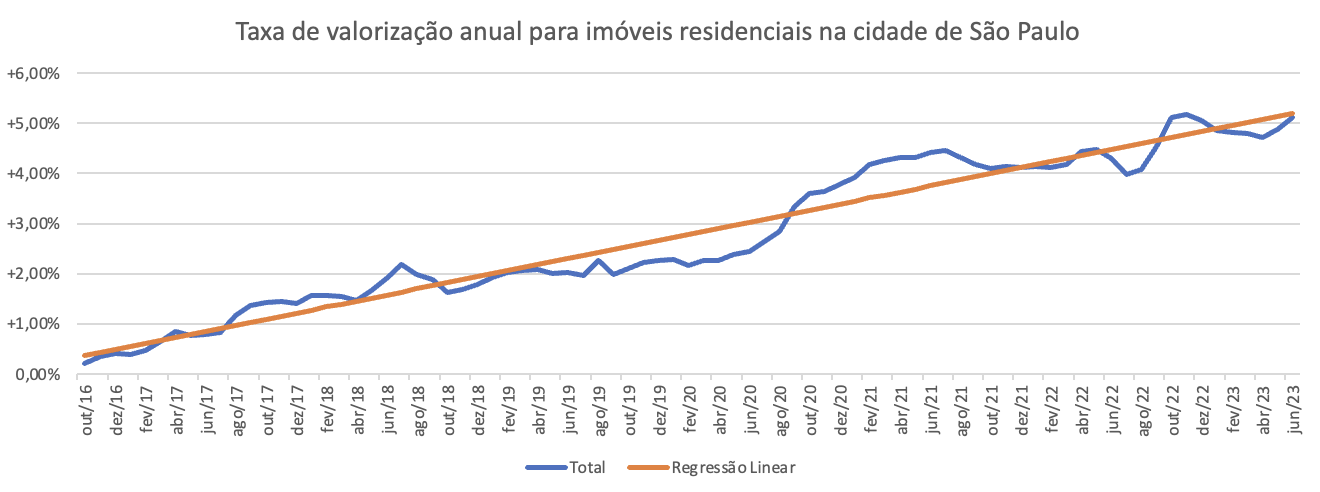

https://www.fipe.org.br/pt-br/indices/fipezap/#

https://www.tenda.com/blog/trilha-da-conquista/valorizacao-de-imoveis/

In [1]:
def projecao_valor_imovel(valor, taxa, tempo, var = 0.00724460595785752):

    if int(tempo/12) == 0:
        return valor
    taxa_atual = taxa + var
    valor_atual = valor*(1+taxa_atual)
    if int(tempo/12) == 1:
        return valor_atual
    else:
        return projecao_valor_imovel(valor_atual, taxa_atual, tempo-12, var)

In [2]:
#0.0519918707909521 anual
#0.0042327149821544 mensal
projecao_valor_imovel(200000, 0.0519918707909521, 180)

950564.6199252355

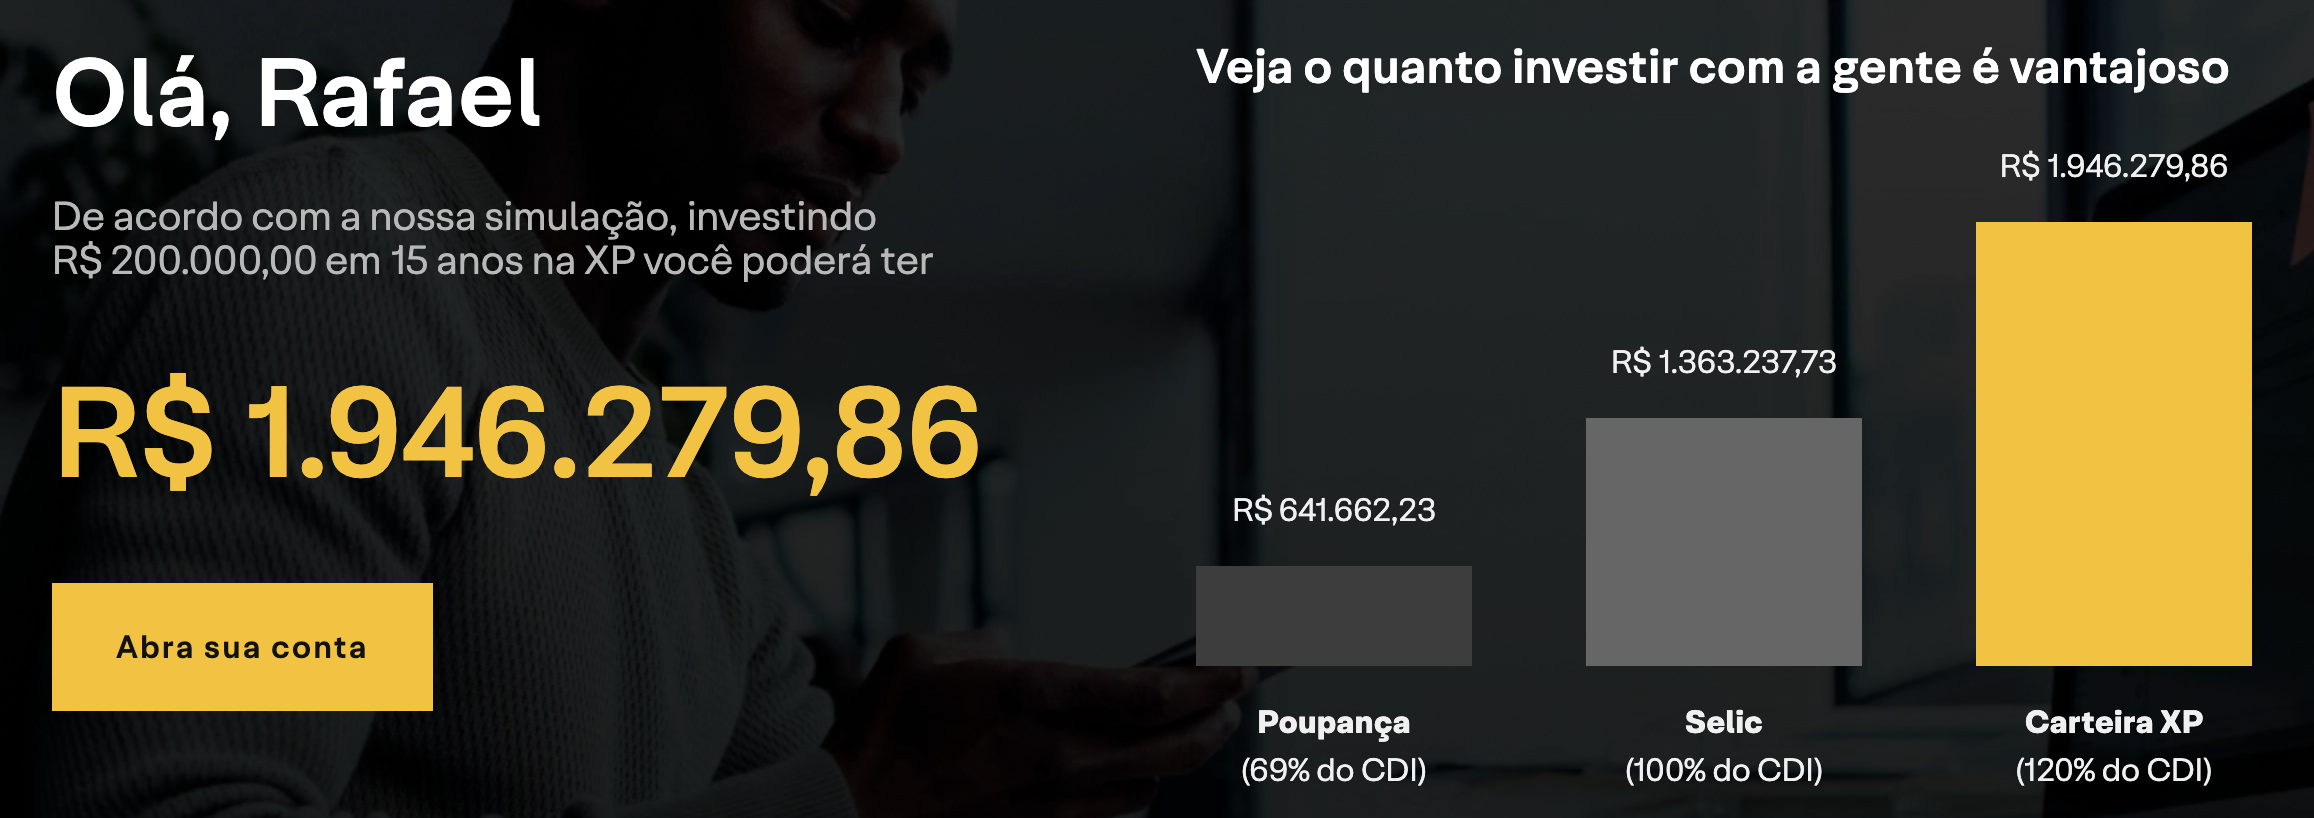

# Alugar um imóvel

### Valor do aluguel

De acordo com as informações disponíveis, a regra mais comum e amplamente utilizada para calcular o valor do aluguel é aplicar uma taxa que varia entre 0,5% e 1% ao mês sobre o valor de mercado do imóvel. Com base nessa faixa de valores, vamos determinar a partir de qual montante se torna vantajoso optar pelo aluguel.

https://www.sienge.com.br/blog/calculo-de-aluguel/

### Valorização anual do aluguel

A FipeZAP+ também disponibiliza informações relevantes sobre a variação dos valores de aluguel das residências, conforme ilustrado nos dados abaixo:

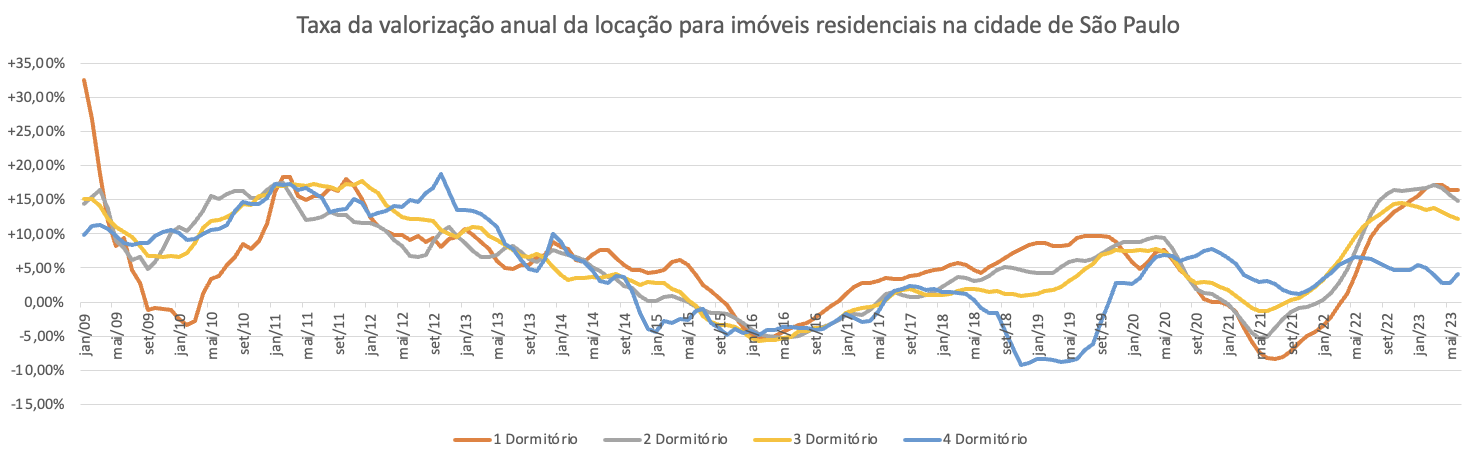

Com base nos dados analisados, é perceptível que, em alguns momentos, houve uma notável diferença na variação dos aluguéis, dependendo da quantidade de dormitórios dos imóveis. Assim como fizemos na análise de vendas, optamos por calcular as médias entre todos os imóveis para uma comparação mais abrangente.

Durante nossa análise, comparamos a variação anual dos aluguéis com a valorização anual dos apartamentos e notamos que existe uma correlação entre ambos, exceto no período da pandemia de Covid-19. Nesse período, os imóveis mantiveram sua valorização, no entanto, a variação dos aluguéis teve uma forte queda, chegando até a ficar negativa.

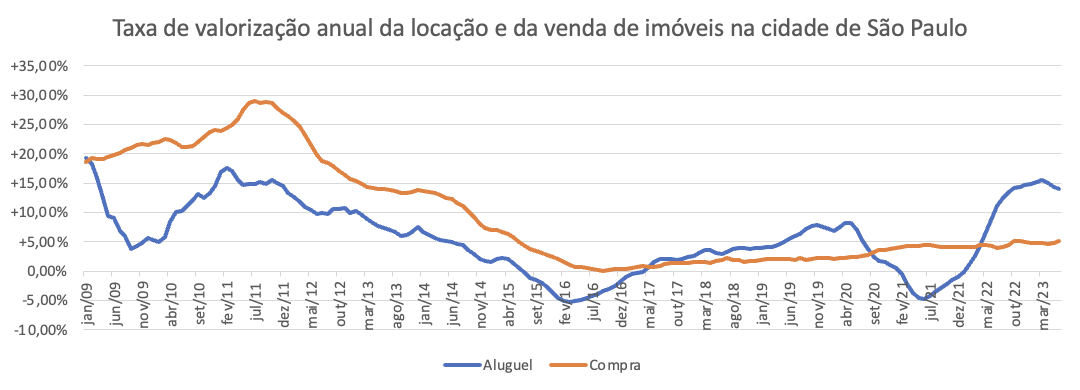

Dado que a situação apresenta uma considerável variação, decidimos manter a prática de vincular o valor do aluguel ao valor do apartamento, com reajustes realizados a cada 12 meses. Essa abordagem nos permite acompanhar as flutuações do mercado imobiliário e garantir uma relação justa entre o valor de locação e o valor do imóvel ao longo do tempo.

In [3]:
def valor_do_alugel(valor, taxa, tempo, taxa_valorizacao, variacao):
    valor_aluguel = projecao_valor_imovel(valor, taxa_valorizacao, tempo, variacao)*taxa
    return valor_aluguel

In [4]:
valor_do_alugel(100000, 0.01, 13, 0.0519918707909521, 0)

1051.9918707909521

### Taxa do investimento

Poupança 8,48% ao ano, que equivale a 0,68% ao mês
100% do CDI 11,01% ao ano, que equivale a 0,87% ao mês
120% do CDI 13,34 ao ano, que equivale a 1,05% ao mês

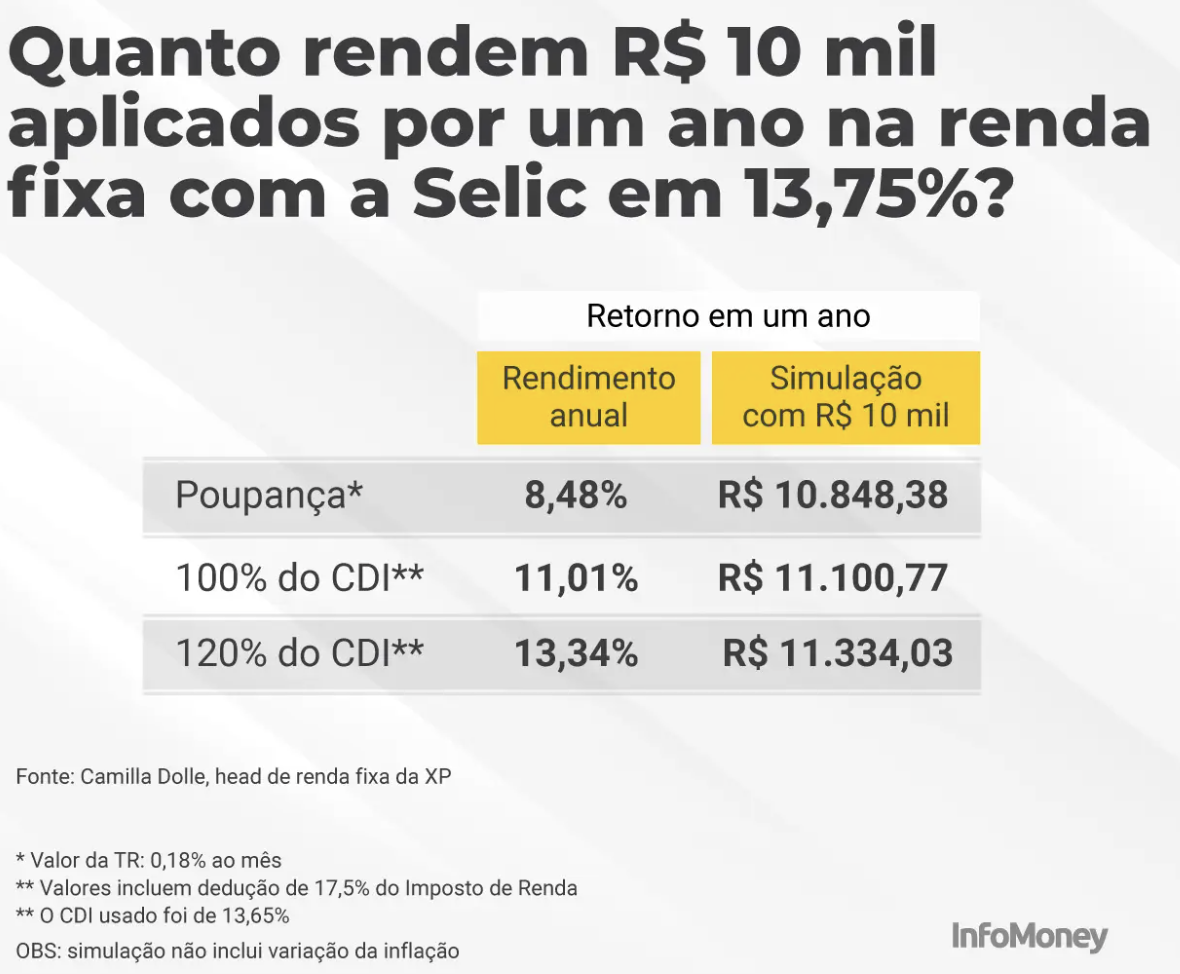

https://www.infomoney.com.br/onde-investir/quanto-rendem-r-10-mil-na-poupanca-e-no-cdb-com-a-selic-estagnada-em-1375-confira-simulacao/    

In [5]:
def montante(valor, taxa, tempo, taxa_aluguel, valor_inicial, taxa_valorizacao, variacao, ite=0):
    
    if tempo == 0:
        return valor
    valor_final = valor + valor*taxa
    valor_final = valor_final - valor_do_alugel(valor_inicial, taxa_aluguel, ite, taxa_valorizacao, variacao)
    ite = ite+1
    if ite == tempo:
        return valor_final

    return montante(valor_final, taxa, tempo, taxa_aluguel, valor_inicial, taxa_valorizacao, variacao, ite)

In [6]:
montante(300000, 0.01, 120, 0.005, 300000, 0.05, 0)

576213.7434440256

# Comparação entre a compra e a alocação

In [7]:
valor_imovel = 500000
tempo = 240
taxa_valorizacao = 0.0919918707909521
#taxa_valorizacao = 0.0005
#variacao = 0.00724460595785752
variacao = 0

taxa_investimento = 0.010
porcentagem_aluguel = 0.007

print(f"Comprando o imóvel ele valerá R$ {round(projecao_valor_imovel(valor_imovel, taxa_valorizacao, tempo, variacao),2)}")
print(f"Investindo o dinheiro você terá R$ {round(montante(valor_imovel, taxa_investimento, tempo, porcentagem_aluguel, valor_imovel, taxa_valorizacao, variacao),2)}")

Comprando o imóvel ele valerá R$ 2906418.24
Investindo o dinheiro você terá R$ -1026932.99


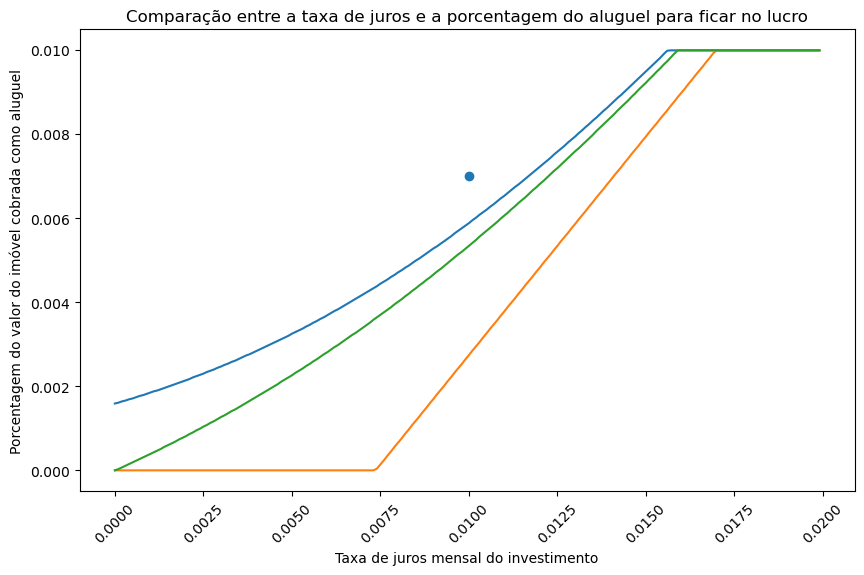

In [8]:
import numpy as np
import matplotlib.pyplot as plt

taxa_inv = np.arange(0.0,0.02,0.0001)
porc_imovel = np.arange(0.0,0.01,0.00001)

h = []
l = []
g = []

for i in taxa_inv:
    if True in (montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>projecao_valor_imovel(valor_imovel, taxa_valorizacao, tempo, variacao)):
        h.append(np.where(montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>projecao_valor_imovel(valor_imovel,taxa_valorizacao, tempo, variacao))[0][-1])
    else:
        h.append(0)
        
for i in taxa_inv:
    if True in (montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>0):
        l.append(np.where(montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>0)[0][-1])
    else:
        l.append(0)
        
for i in taxa_inv:
    if True in (montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>valor_imovel):
        g.append(np.where(montante(valor_imovel, i, tempo, porc_imovel, valor_imovel, taxa_valorizacao, variacao)>valor_imovel)[0][-1])
    else:
        g.append(0)
        
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(taxa_inv, porc_imovel[l])
ax.plot(taxa_inv, porc_imovel[h])
ax.plot(taxa_inv, porc_imovel[g])
ax.scatter(taxa_investimento, porcentagem_aluguel)

#plt.xlim(0.013,0.014)
#plt.ylim(0.009,0.010)

ax.set(title = "Comparação entre a taxa de juros e a porcentagem do aluguel para ficar no lucro",
       xlabel = "Taxa de juros mensal do investimento",
       ylabel = "Porcentagem do valor do imóvel cobrada como aluguel")

plt.setp(ax.get_xticklabels(), rotation = 45)

plt.show()